In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import pandas as pd 
import seaborn as sns

/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/multivariate/exchange_rate/exchange_rate.txt', names=[
    "Australia", "Britain", "Canada", "Switzerland", "China", "Japan", "New Zealand", "Singappre"
])

In [4]:
df.head(5)

,Australia,Britain,Canada,Switzerland,China,Japan,New Zealand,Singappre
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [7]:
X = df.iloc[:, :-2] # new zealand and singapore exchange rate
y = df.iloc[:, -2:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6070, 6) (1518, 6)
(6070, 2) (1518, 2)


In [10]:
models = {
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
}

In [11]:
param_grids = {
    'ElasticNet': {
        'alpha': [0.1, 1, 10],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [1000, 2000, 3000],
        'tol': [1e-3, 1e-4, 1e-5]
    },
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    },
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3]
    }
}

In [12]:
def show_results(y_test, y_pred):
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))

In [13]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    f = grid_search.best_params_
    print(f"Best parameters: {f}")
    model = grid_search.best_estimator_
    
    y_pred = model.predict(X_test)
    results[name] = y_pred
    
    show_results(y_test, y_pred)

Training ElasticNet...


/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumP

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.001}
MSE: 0.008346721210159464
RMSE: 0.09136039191115297
MAPE: 0.12270228932260306
R2: 0.13753096535032716
Training KNeighborsRegressor...
Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
MSE: 1.6096061833262045e-05
RMSE: 0.0040119897598650525
MAPE: 0.003770390154368793
R2: 0.9984921751293818
Training RandomForestRegressor...
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
MSE: 0.00011110402118322839
RMSE: 0.010540589223721242
MAPE: 0.010866819393350985
R2: 0.9896456967433127


In [14]:
print(results['ElasticNet'].shape)
print(y_test.shape)

(1518, 2)
(1518, 2)


In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def plot_in_3d(y_test, y_pred):
    df1 = pd.DataFrame(y_test)
    df2 = pd.DataFrame(y_pred, columns=['New Zealand', 'Singapore'])
    
    print(df1.head(5))
    print(df2.head(5))

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot DataFrame 1
    ax.scatter(df1["New Zealand"], df1["Singapore"], zs=0, zdir="z", label="DataFrame 1", marker="o")

    # Plot DataFrame 2
    ax.scatter(df2["New Zealand"], df2["Singapore"], zs=1, zdir="z", label="DataFrame 2", marker="^")

    # Customize the plot
    ax.set_xlabel("New Zealand exchange rate")
    ax.set_ylabel("Singapore exchange rate")
    ax.set_zlabel("Count")
    ax.legend()

    # Display the plot
    plt.show()

      New Zealand  Singapore
5164     0.737844   0.719166
6140     0.832258   0.818264
1737     0.690800   0.701508
1446     0.653700   0.706714
586      0.535200   0.613987
   New Zealand  Singapore
0     0.739197   0.719250
1     0.841799   0.817609
2     0.693651   0.701079
3     0.655085   0.705558
4     0.534722   0.613548


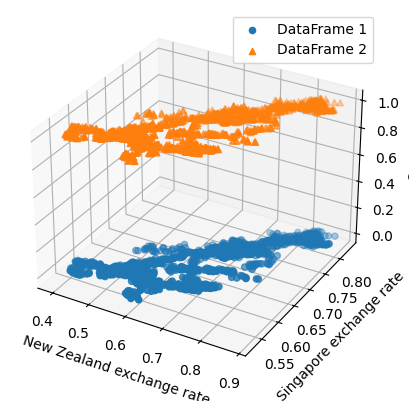

In [ ]:
plot_in_3d(y_test, results['KNeighborsRegressor'])

      New Zealand  Singapore
5164     0.737844   0.719166
6140     0.832258   0.818264
1737     0.690800   0.701508
1446     0.653700   0.706714
586      0.535200   0.613987
   New Zealand  Singapore
0     0.730352   0.719630
1     0.828486   0.807639
2     0.693572   0.705601
3     0.663616   0.707232
4     0.540547   0.614899


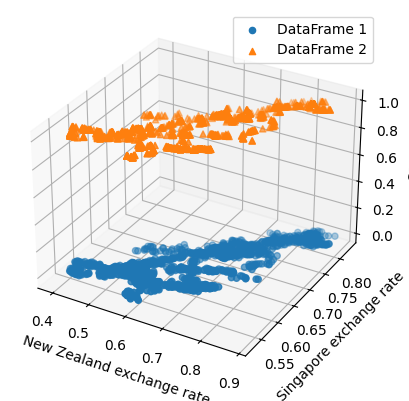

In [ ]:
plot_in_3d(y_test, results['RandomForestRegressor'])